In [0]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [0]:
file = "Pepsico.csv"
file2 = "Alibaba.csv"
file3 = "VinGroup.csv"

In [0]:
val_size=0.2
test_size=0.2
N_max=60

In [0]:
def lin_reg(df,col_name,N,offset):
    rgs = LinearRegression()
    y_pred = []
    
    for i in range(offset,len(df)):
#         print(i, offset, len(df))
        X_train = np.array(range(len(df[i-N:i])))
        y_train = np.array(df[col_name][i-N:i])
        X_train = X_train.reshape(-1,1)
        y_train = y_train.reshape(-1,1)
        
        rgs.fit(X_train,y_train)
        pred = rgs.predict(np.array(N).reshape(-1,1))
        y_pred.append(pred[0][0])
        
    return y_pred

In [0]:
#calculating RMSE and MAPE
def get_metrics(y_pred,y_test):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    z = pd.DataFrame(np.abs((y_test - y_pred)/y_test)).replace(np.inf, np.nan)
    MAPE = z.mean() * 100
    
    RMSE = math.sqrt(mean_squared_error(y_pred,y_test))
    print('RMSE %2f' %(RMSE))
    print('MAPE %2f' %(MAPE))
    return RMSE,MAPE

In [0]:
def split_data(path, val_size=0.2, test_size=0.2, N_max=60):
    data = pd.read_csv(path)  
    df = pd.DataFrame(data.loc[:, ['close']])
    
    #taking the first difference in time series 
    df_diff = df - df.shift()
    df_diff.dropna(inplace=True)
  
    num_val = int(val_size*len(df_diff))
    num_test = int(test_size*len(df_diff))
    num_train = int(len(df_diff) - num_val - num_test)

    trainset = df_diff[:num_train+num_val]
    valset = df_diff[num_train:num_train+num_val]
    testset = df_diff[num_train + num_val:]
  
    return trainset, valset, testset,df_diff, num_val, num_test, num_train

In [0]:
#finding optimal N by choosing value corresponding to lowest MAPE (and RMSE) observed
def create_model(trainset, valset, testset,df_diff, num_train, num_val, N_max=60):
    RMSE = []
    MAPE = []
    for i in range(1,N_max):
        y_pred = lin_reg(trainset,'close',i,num_train)
        RMSE.append(math.sqrt(mean_squared_error(y_pred,valset['close'])))
        MAPE.append(mape_eval(valset['close'],y_pred))
    return RMSE, MAPE

In [0]:
def get_accuracy(df_diff,testset, num_train, num_val, num_optimize):
  #constructing ground truth movement array
  movement_gt = np.zeros_like(testset['close'])
  for i in range(len(testset['close'])):
      if testset['close'].iat[i] > 0:
          movement_gt[i] = 1
      else:
          movement_gt[i] = 0  
  
  whole_y_pred = poly(df_diff,'close',num_optimize,num_train+num_val)
  
  #constructing predicted movement array
  movement_pred = np.zeros_like(np.array(whole_y_pred))
  for i in range(len(whole_y_pred)):
      if whole_y_pred[i] > 0:
          movement_pred[i] = 1
      else:
          movement_pred[i] = 0
          
  #compare and calculate accuracy as number of correct prediction over number of observation
  movement = (movement_pred==movement_gt)
  accuracy = np.unique(movement, return_counts=True)[1][1] / len(whole_y_pred)
  return accuracy, whole_y_pred

# PEPSICO LINEAR REGRESSION 

In [0]:
trainset, valset, testset,df_diff, num_val, num_test, num_train = split_data(file, val_size, test_size)


In [0]:
RMSE, MAPE = create_model(trainset, valset, testset,df_diff, num_train,num_val, N_max)

E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the

E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the

Text(0, 0.5, 'RMSE')

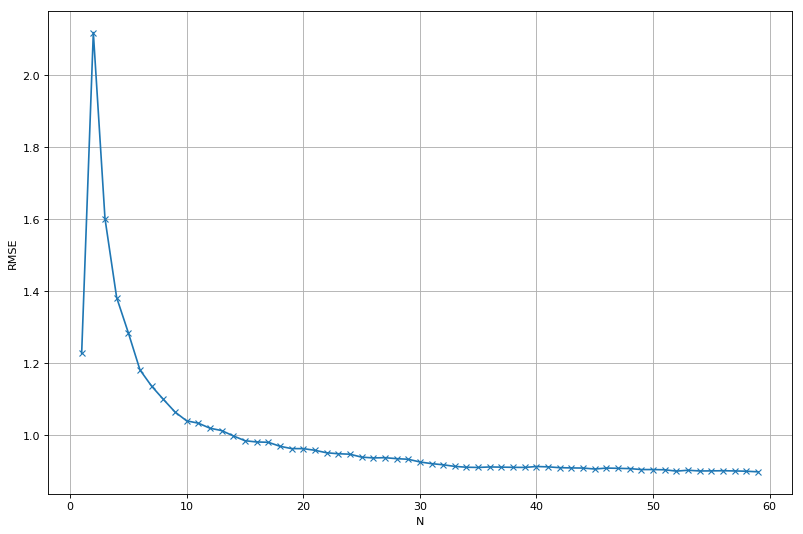

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')

Text(0, 0.5, 'MAPE')

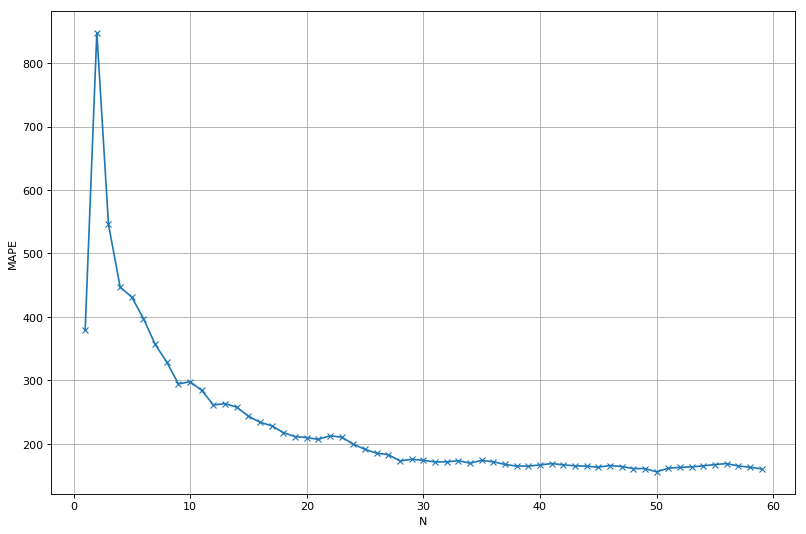

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max), MAPE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')

Optimal N is 50

In [0]:
accuracy, whole_y_pred = get_accuracy(df_diff, testset, num_train, num_val, num_optimize=50)
print(accuracy)
rmse,mape = get_metrics(whole_y_pred,testset['close'])

0.5188866799204771
RMSE 1.158778
MAPE 203.705548


E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


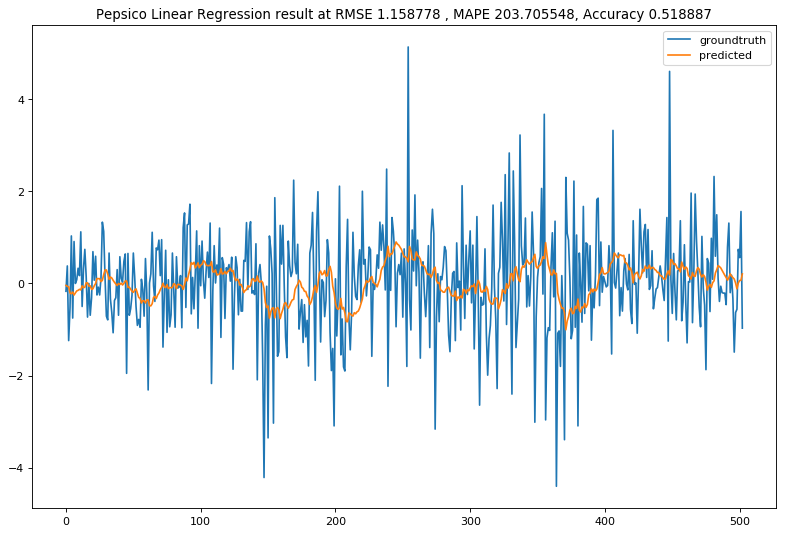

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Pepsico Linear Regression result at RMSE %2f , MAPE %2f, Accuracy %2f' %(rmse,mape,accuracy))
plt.plot(testset['close'].values,label = 'groundtruth')
plt.plot(whole_y_pred,label='predicted')
plt.legend()

# ALIBABA LINEAR REGRESSION


In [0]:
trainset2, valset2, testset2, df_diff2, num_val2, num_test2, num_train2 = split_data(file2, val_size, 0.2)

In [0]:
RMSE2, MAPE2 = create_model(trainset2, valset2, testset2,df_diff2, num_train2,num_val2, N_max)

Text(0, 0.5, 'RMSE2')

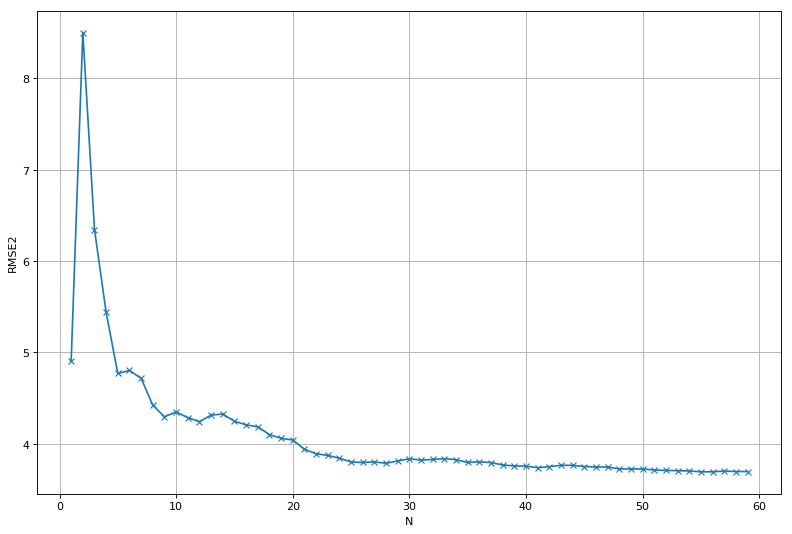

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max), RMSE2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE2')

Text(0, 0.5, 'MAPE2')

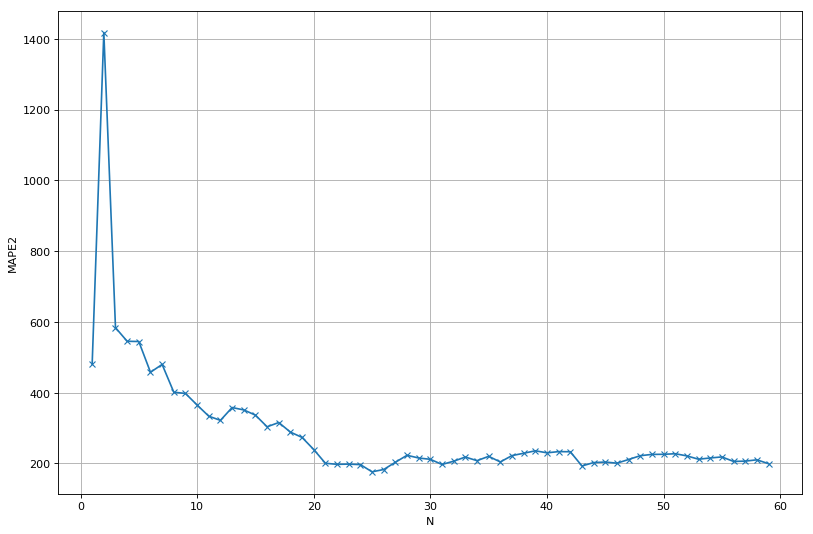

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max), MAPE2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE2')

N optimum is 25

In [0]:
accuracy_2, whole_y_pred2 = get_accuracy(df_diff2, testset2, num_train2, num_val2, num_optimize=25)
print(accuracy_2)
rmse2,mape2 = get_metrics(whole_y_pred2,testset2['close'])

0.5601659751037344
RMSE 3.812776
MAPE 200.094340


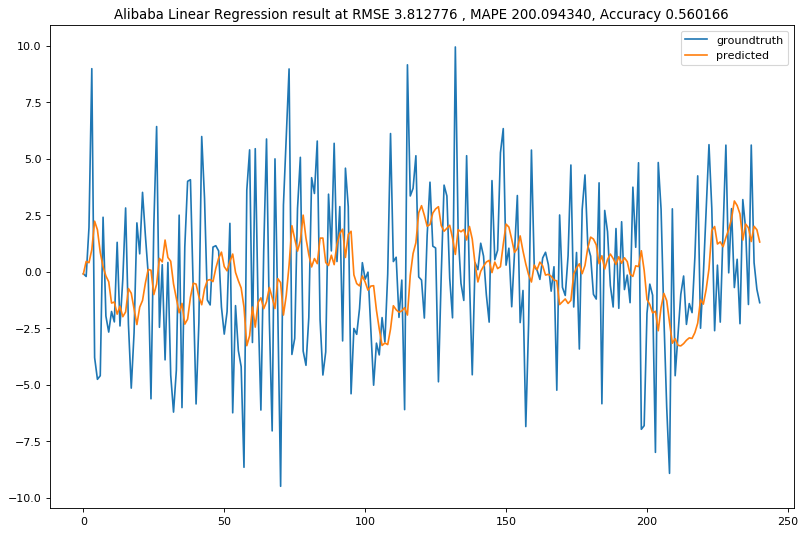

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Alibaba Linear Regression result at RMSE %2f , MAPE %2f, Accuracy %2f' %(rmse2,mape2,accuracy_2))
plt.plot(testset2['close'].values,label = 'groundtruth')
plt.plot(whole_y_pred2,label='predicted')
plt.legend()

# VINGROUP LINEAR REGRESSION

In [0]:
trainset3, valset3, testset3, df_diff3, num_val3, num_test3, num_train3 = split_data(file3, val_size, test_size)

In [0]:
RMSE3, MAPE3 = create_model(trainset3, valset3, testset3,df_diff3, num_train3,num_val3, N_max)

E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cw

E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the

Text(0, 0.5, 'RMSE3')

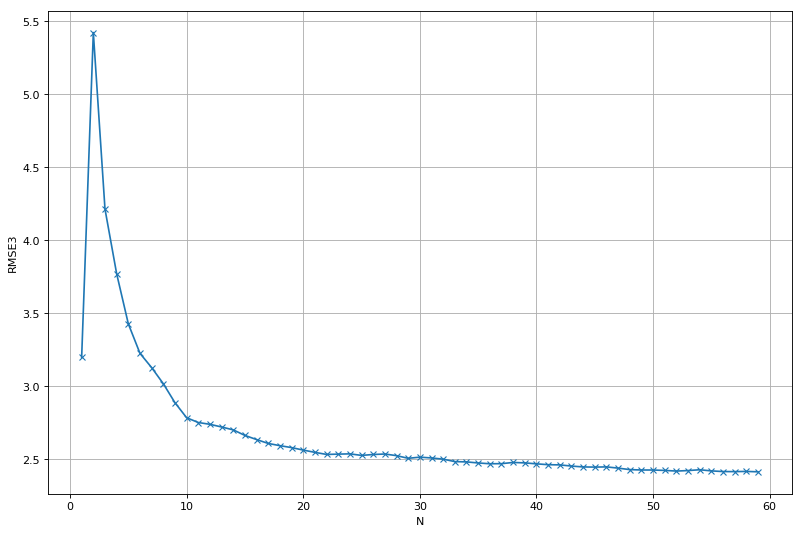

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max), RMSE3, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE3')

Text(0, 0.5, 'MAPE3')

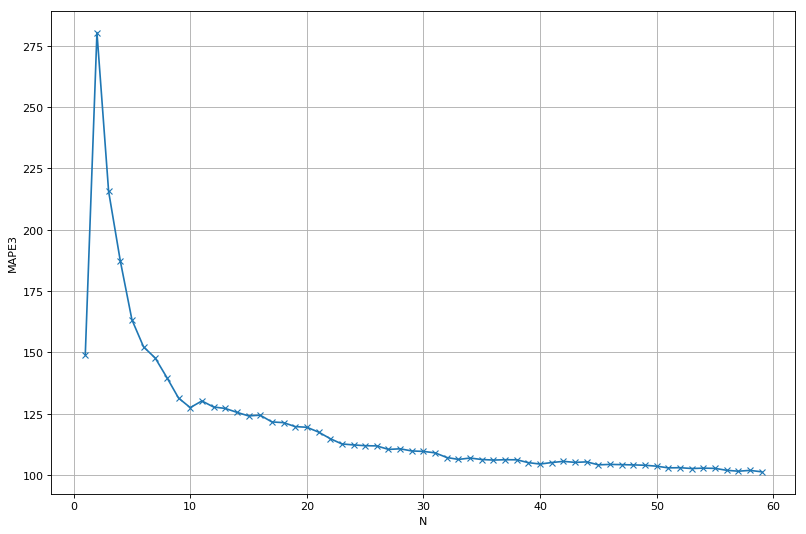

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max), MAPE3, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE3')

In [0]:
accuracy3, whole_y_pred3 = get_accuracy(df_diff3, testset3, num_train3, num_val3, num_optimize=59)
print(accuracy3)
rmse3,mape3 = get_metrics(whole_y_pred3,testset3['close'])

0.4839357429718876
RMSE 3.363490
MAPE 112.438653


E:\Anaconda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


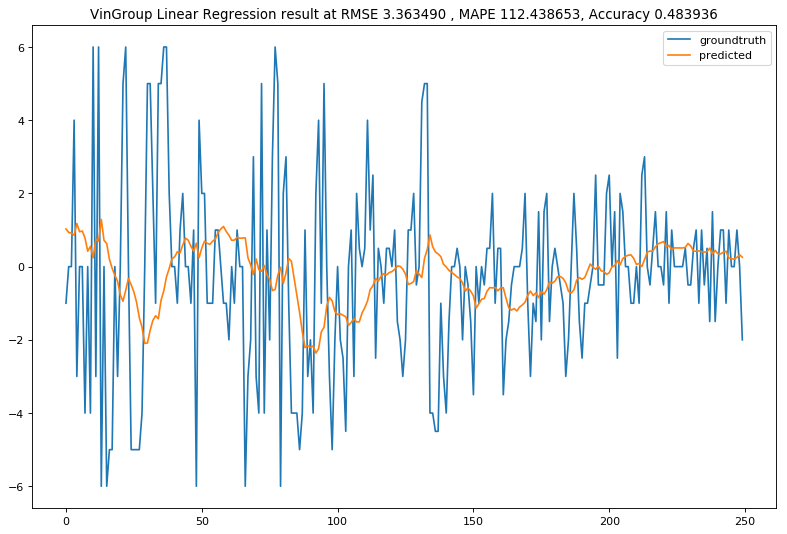

In [0]:
plt.figure(figsize=(12, 8), dpi=80)
plt.title('VinGroup Linear Regression result at RMSE %2f , MAPE %2f, Accuracy %2f' %(rmse3,mape3,accuracy3))
plt.plot(testset3['close'].values[:250],label = 'groundtruth')
plt.plot(whole_y_pred3[:250],label='predicted')
plt.legend()